In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
hdf=pd.read_csv("heart_failure_clinical_records_dataset.csv")
hdf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [24]:
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
hdf['age'] = sc.fit_transform(hdf.loc[:,['age']])
hdf['creatinine_phosphokinase'] = sc.fit_transform(hdf.loc[:,['creatinine_phosphokinase']])
hdf['ejection_fraction'] = sc.fit_transform(hdf.loc[:,['ejection_fraction']])
hdf['platelets'] = sc.fit_transform(hdf.loc[:,['platelets']])
hdf['serum_creatinine'] = sc.fit_transform(hdf.loc[:,['serum_creatinine']])
hdf['serum_sodium'] = sc.fit_transform(hdf.loc[:,['serum_sodium']])
hdf['time'] = sc.fit_transform(hdf.loc[:,['time']])

In [25]:
hdf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0,0.071319,0,0.090909,1,0.290823,0.157303,0.485714,1,0,0.000000,1
1,0.272727,0,1.000000,0,0.363636,0,0.288833,0.067416,0.657143,1,0,0.007117,1
2,0.454545,0,0.015693,0,0.090909,0,0.165960,0.089888,0.457143,1,1,0.010676,1
3,0.181818,1,0.011227,0,0.090909,0,0.224148,0.157303,0.685714,1,0,0.010676,1
4,0.454545,1,0.017479,1,0.090909,0,0.365984,0.247191,0.085714,0,0,0.014235,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.400000,0,0.004848,1,0.363636,1,0.157474,0.067416,0.857143,1,1,0.946619,0
295,0.272727,0,0.229268,0,0.363636,0,0.296884,0.078652,0.742857,0,0,0.950178,0
296,0.090909,0,0.259888,1,0.696970,0,0.869075,0.033708,0.714286,0,0,0.975089,0
297,0.090909,0,0.304925,0,0.363636,0,0.139290,0.101124,0.771429,1,1,0.982206,0


In [26]:
X=hdf[['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']]
y=y=hdf['DEATH_EVENT']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.28,random_state=0)
cl = svm.SVC()
cl.fit(x_train, y_train)

SVC()

In [27]:
print(cl.score(x_train, y_train))
print(cl.score(x_test, y_test))

0.8651162790697674
0.7976190476190477


In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test,y_cl))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86        56
           1       0.87      0.46      0.60        28

    accuracy                           0.80        84
   macro avg       0.82      0.71      0.73        84
weighted avg       0.81      0.80      0.78        84



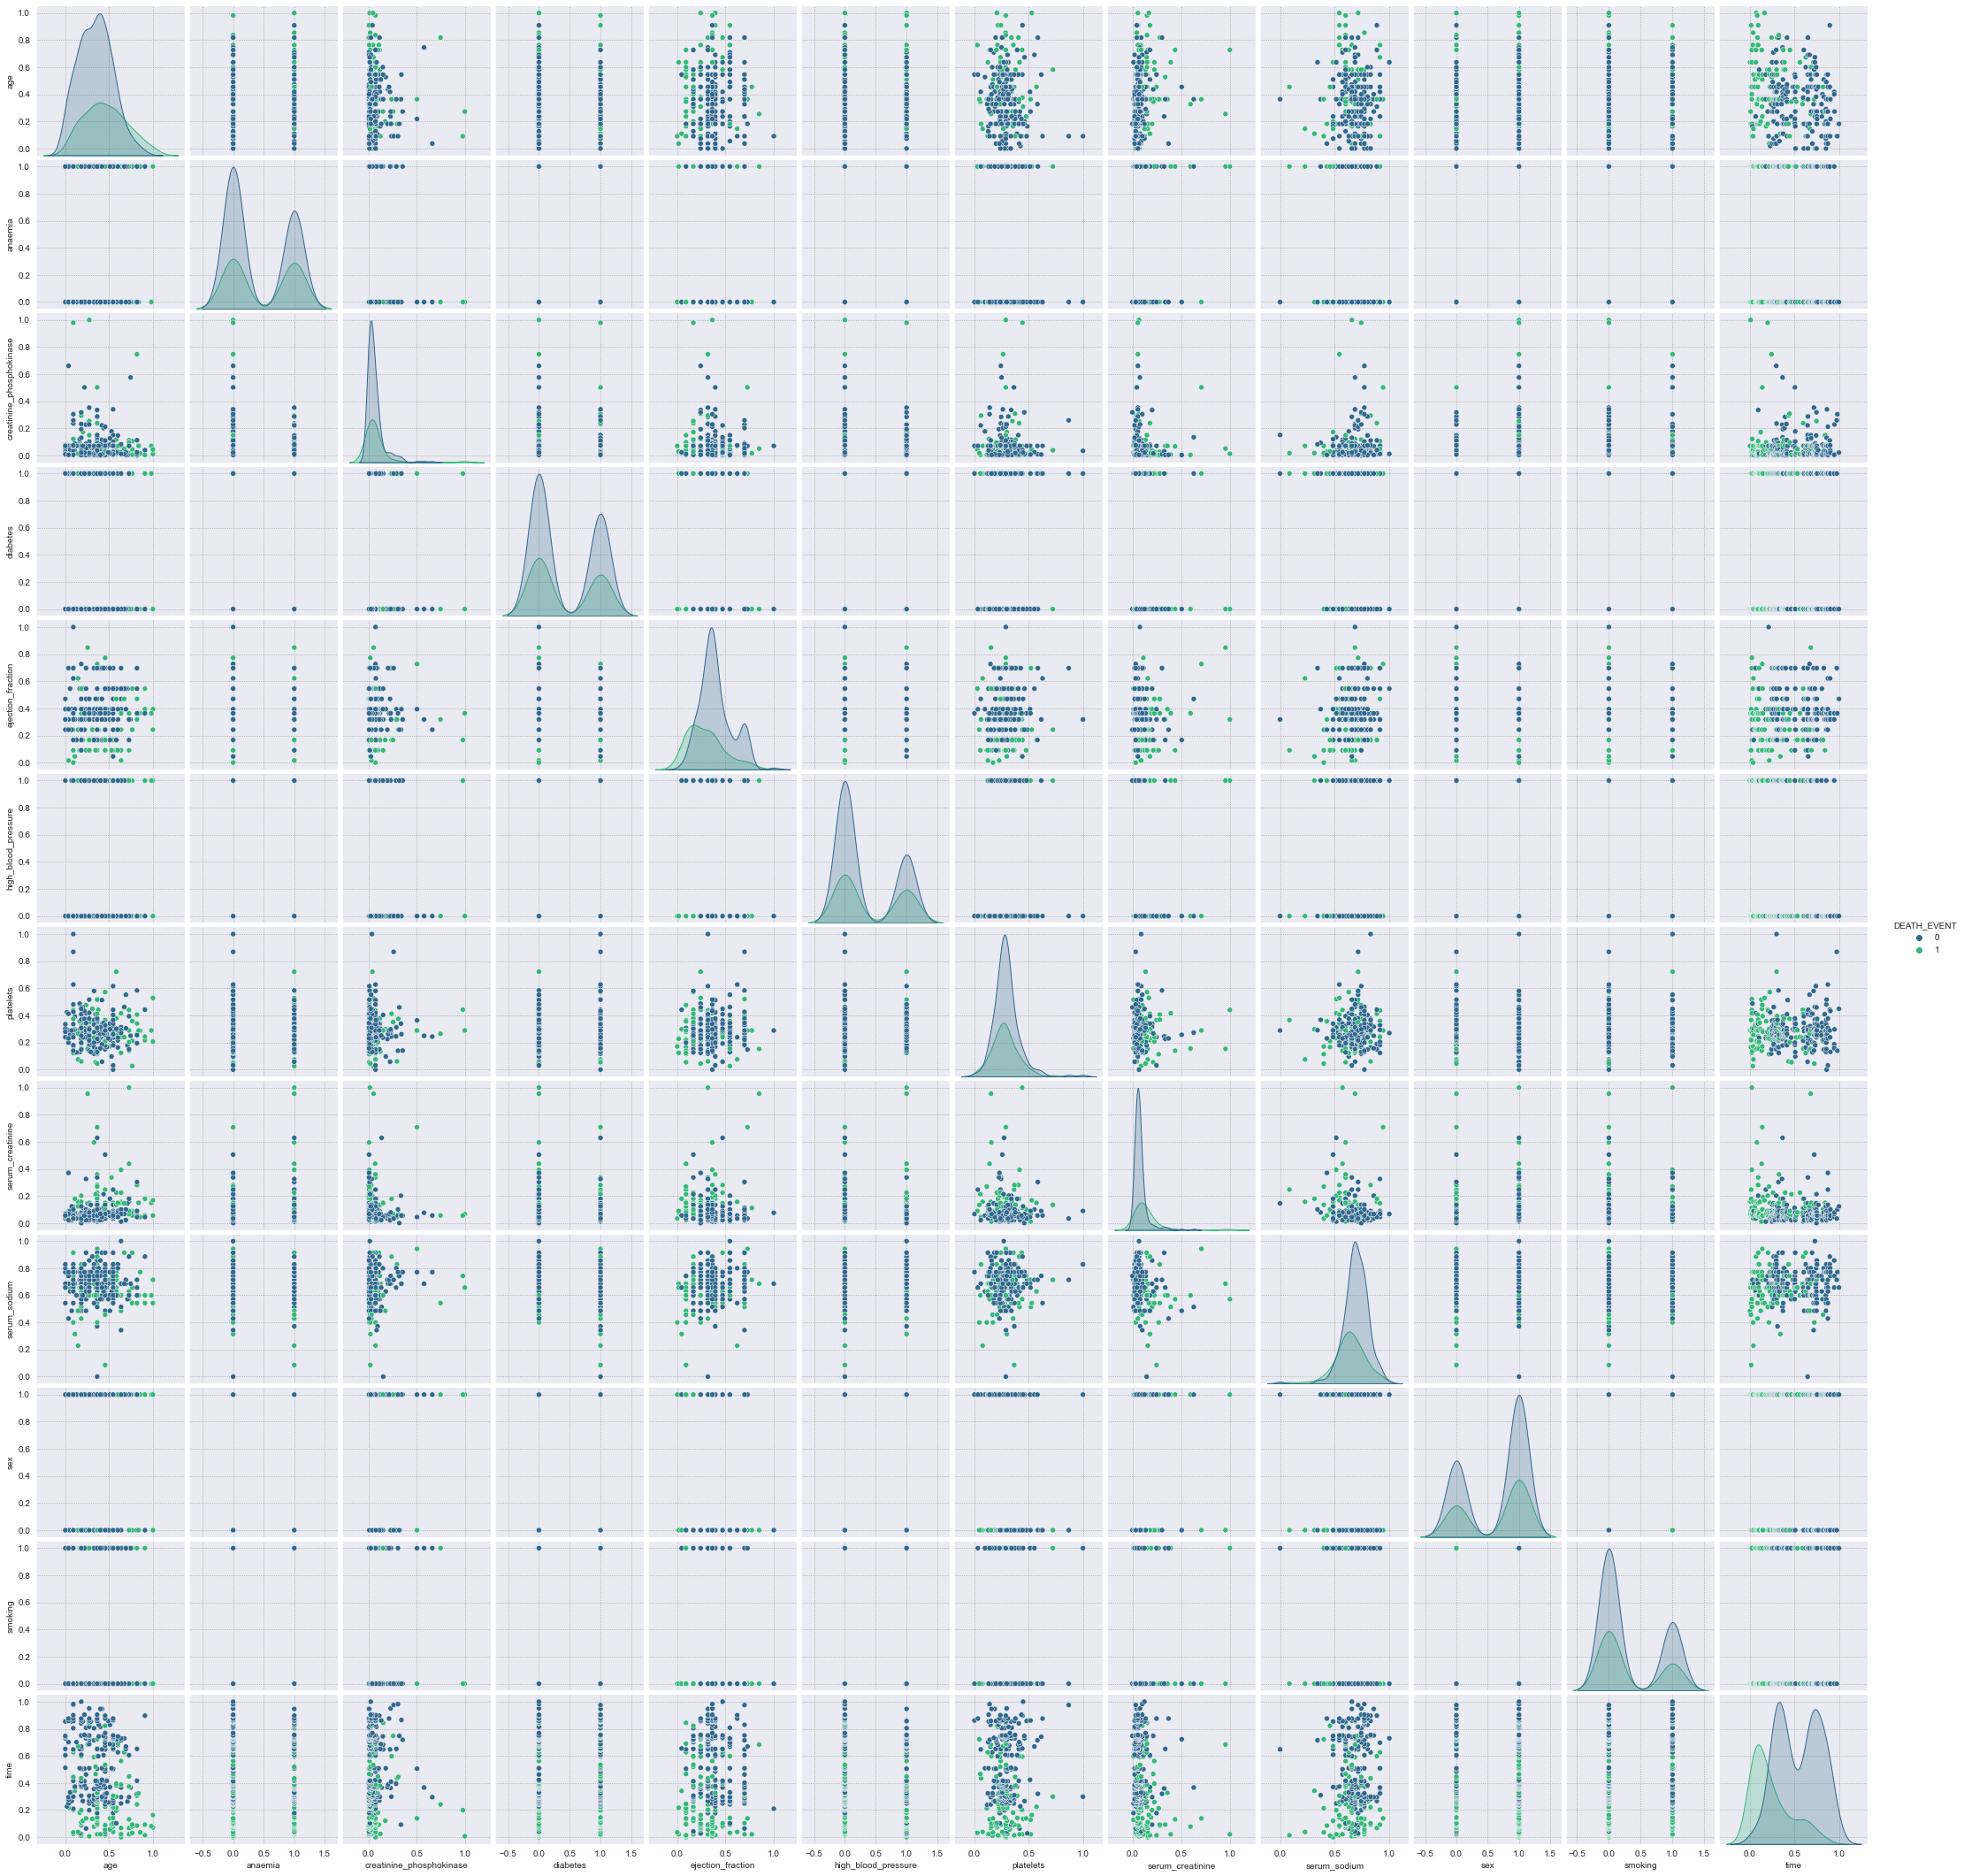

In [30]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.color_palette("BuGn_r", 10)
sns.pairplot(hdf, hue ='DEATH_EVENT',palette='viridis')
plt.show()

<AxesSubplot:>

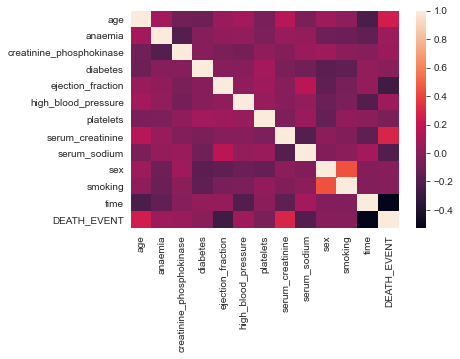

In [31]:
sns.heatmap(hdf.corr())

In [32]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_cl)

In [33]:
print(cm)

[[54  2]
 [15 13]]


<AxesSubplot:>

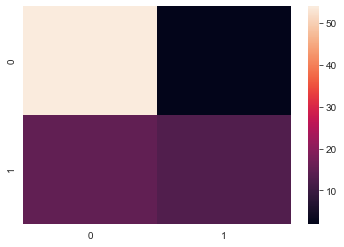

In [34]:
sns.heatmap(cm)

In [35]:
cl.fit_status_

0

In [36]:
cl.intercept_

array([0.36411607])

In [37]:
cl.n_support_

array([73, 66])

In [38]:
y_cl=cl.predict(x_test)

In [39]:
print(y_cl)

[0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 0]
